# Importing Neccesary Libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [175]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [176]:
#loading the datasets
data = pd.read_csv("C:\\Users\\HP\\new3\\MagicBricks.csv")

# Inspecting the Dataframe

In [177]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [178]:
# Describing the dataset
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [179]:
data.shape

(1259, 11)

In [180]:
# Information about Each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


# Handling Null Values

In [181]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [182]:
data.duplicated().sum()

83

In [183]:
data=data.drop_duplicates()

In [184]:
data.duplicated().sum()

0

In [185]:
data.shape

(1176, 11)

In [186]:
#Dropping the unwanted column
data = data.drop(['Locality'], axis = 1)

In [187]:
#Findinng the median value
med = data['Per_Sqft'].median()
med

11111.0

In [188]:
mn = data['Parking'].mean()
mnd= mn.round()
mnd

2.0

In [189]:
#filling the null values with median
data['Parking'].fillna(mnd,inplace=True)

In [190]:
#filling the null values with median
data['Per_Sqft'].fillna(med,inplace=True)

In [191]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       1
Furnishing     5
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [192]:
data= data.dropna()

# Checking for outliers

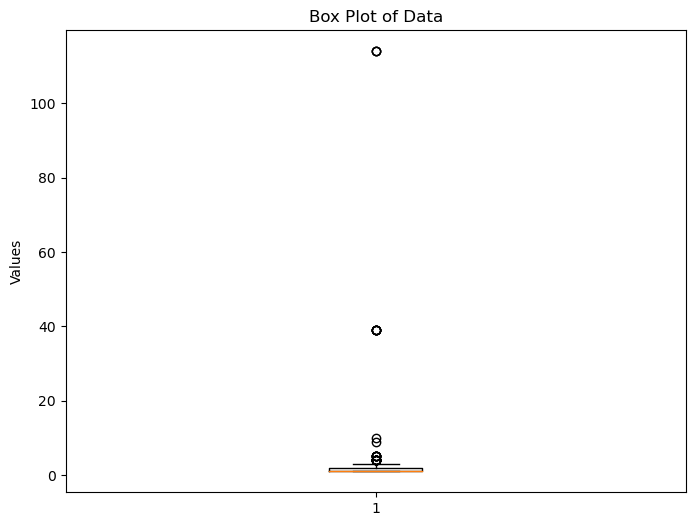

In [193]:
#finding outlier of parking column by using box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Parking'])
plt.title('Box Plot of Data')
plt.ylabel('Values')
plt.show()

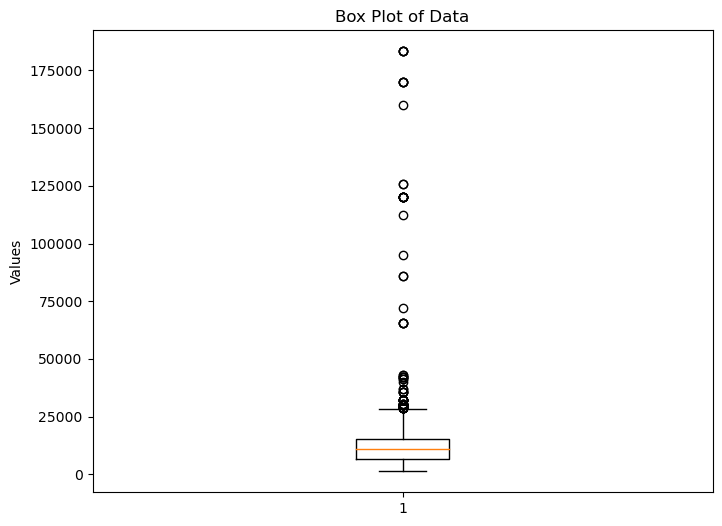

In [194]:
# finding outlier of per sqft column by using box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data['Per_Sqft'])
plt.title('Box Plot of Data')
plt.ylabel('Values')
plt.show()

In [195]:
data.Per_Sqft.skew()

5.928729277951391

# Finding z_score values

In [196]:
z_p=np.abs((data["Parking"]-data["Parking"].mean())/data["Parking"].std())
z_p

0       0.152615
1       0.152615
2       0.152615
3       0.152615
4       0.152615
          ...   
1254    0.158735
1255    0.158735
1256    0.158735
1257    0.152615
1258    0.152615
Name: Parking, Length: 1170, dtype: float64

In [197]:
z_p.describe()

count    1170.000000
mean        0.192008
std         0.981377
min         0.003060
25%         0.003060
50%         0.152615
75%         0.152615
max        17.438671
Name: Parking, dtype: float64

In [198]:
#Removing the outliers
data = data[z_p<1]
data

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,11111.0
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [199]:
z_ps=np.abs((data["Per_Sqft"]-data["Per_Sqft"].mean())/data["Per_Sqft"].std())
z_ps

0       0.191321
1       0.419902
2       0.419902
3       0.419902
4       0.419902
          ...   
1254    0.098479
1255    0.098479
1256    0.098479
1257    0.098479
1258    0.098479
Name: Per_Sqft, Length: 1158, dtype: float64

In [200]:
z_ps.describe()

count    1158.000000
mean        0.444512
std         0.895677
min         0.000648
25%         0.191321
50%         0.294594
75%         0.463468
max         8.667072
Name: Per_Sqft, dtype: float64

In [201]:
data = data[z_ps<1]
data

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,11111.0
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


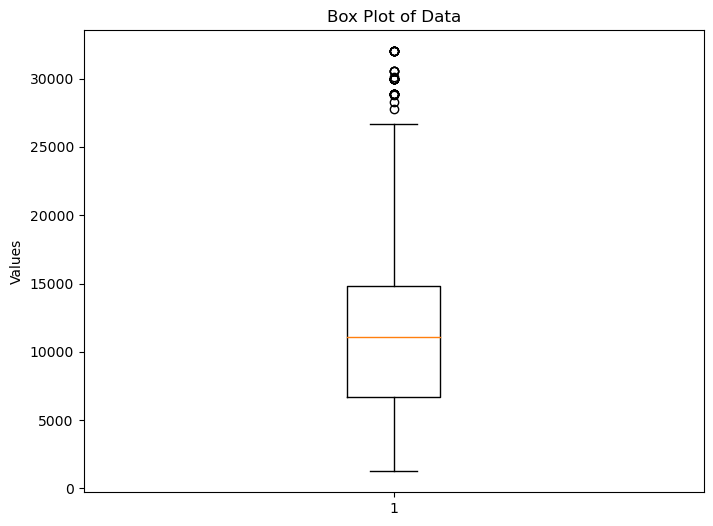

In [202]:
# Checking the cleaned data
plt.figure(figsize=(8, 6))
plt.boxplot(data['Per_Sqft'])
plt.title('Box Plot of Data')
plt.ylabel('Values')
plt.show()

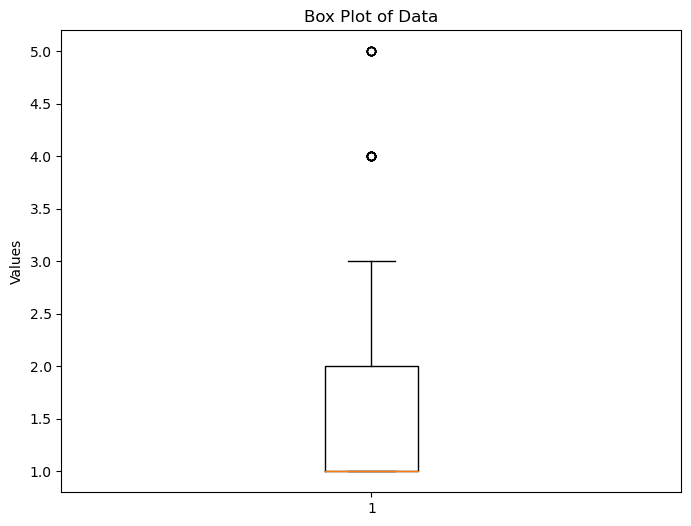

In [203]:
# Checking the cleaned data
plt.figure(figsize=(8, 6))
plt.boxplot(data['Parking'])
plt.title('Box Plot of Data')
plt.ylabel('Values')
plt.show()

In [204]:
data['Type'].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [205]:
#Replacing numeric value with string
data.replace({'Furnishing':{'Semi-Furnished':1,'Unfurnished':0, 'Furnished': 2},'Status':{'Ready_to_move':1,'Almost_ready':0},'Self_Employed':{'No':0,'Yes':1},
            'Transaction':{'Resale':0,'New_Property':1},'Type':{'Apartment':1,'Builder_Floor':0}},inplace=True)

In [206]:
# Check the number of rows and columns in the dataset
print(data.shape)

(1116, 10)


# Correlative Plot

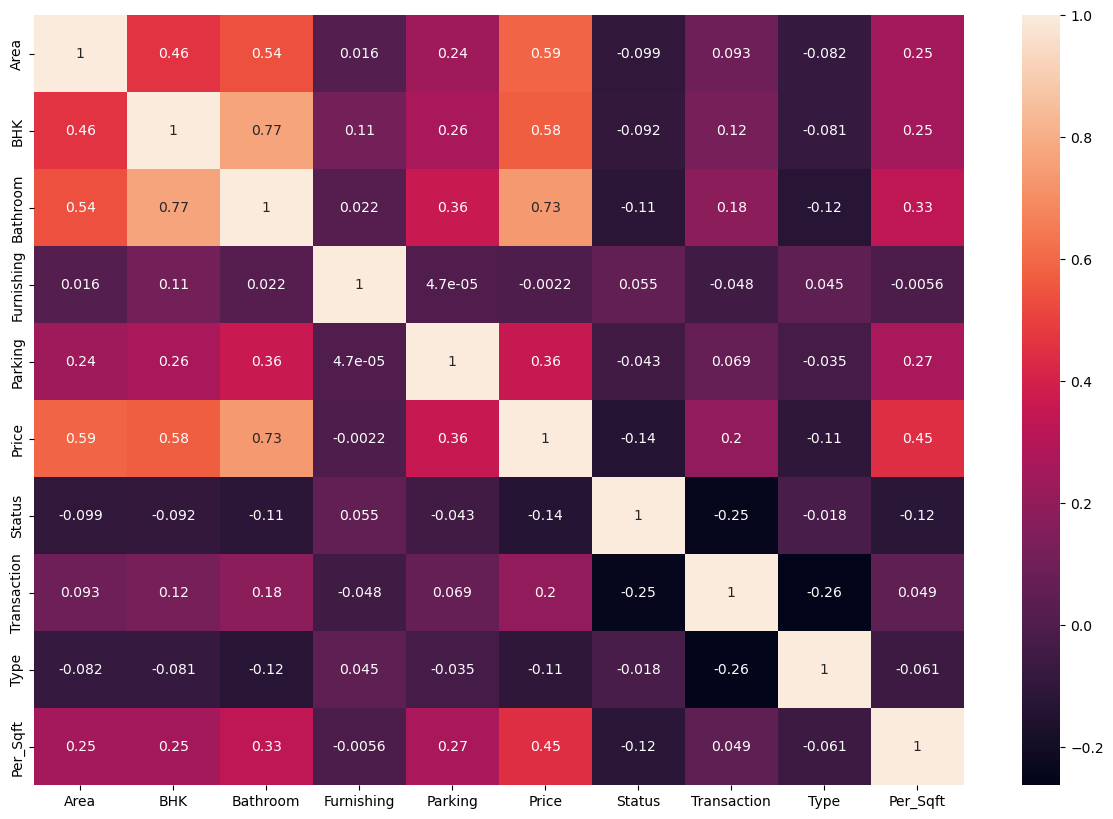

In [207]:
#Plotting a heatmap to show Positive and Negative Correlation with seaborn library
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True);

Bathrooms are positively correlated with BHK which means that more number of bathrooms we have it will increase the BHK of the house which is true.

Price is positively correlated with bathroom which means as the bathroom increases the price of the house increases.

# Data Visualization

# Area vs Price

<Axes: xlabel='Area', ylabel='Price'>

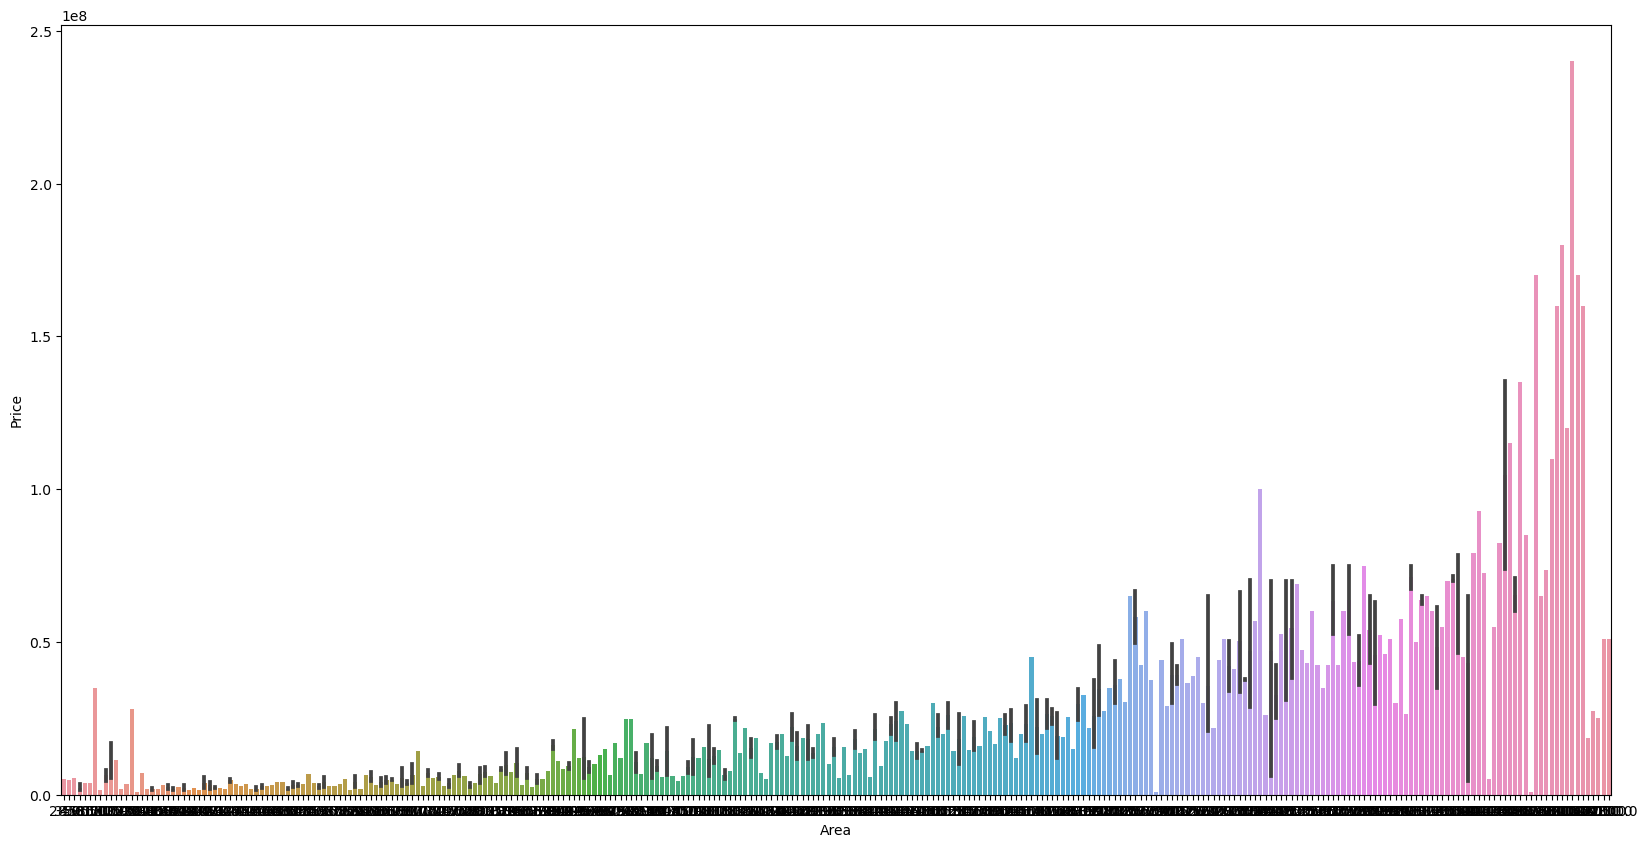

In [248]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x =data.Area, y =data.Price)

# Bathroom vs Price

<Axes: xlabel='Bathroom', ylabel='Price'>

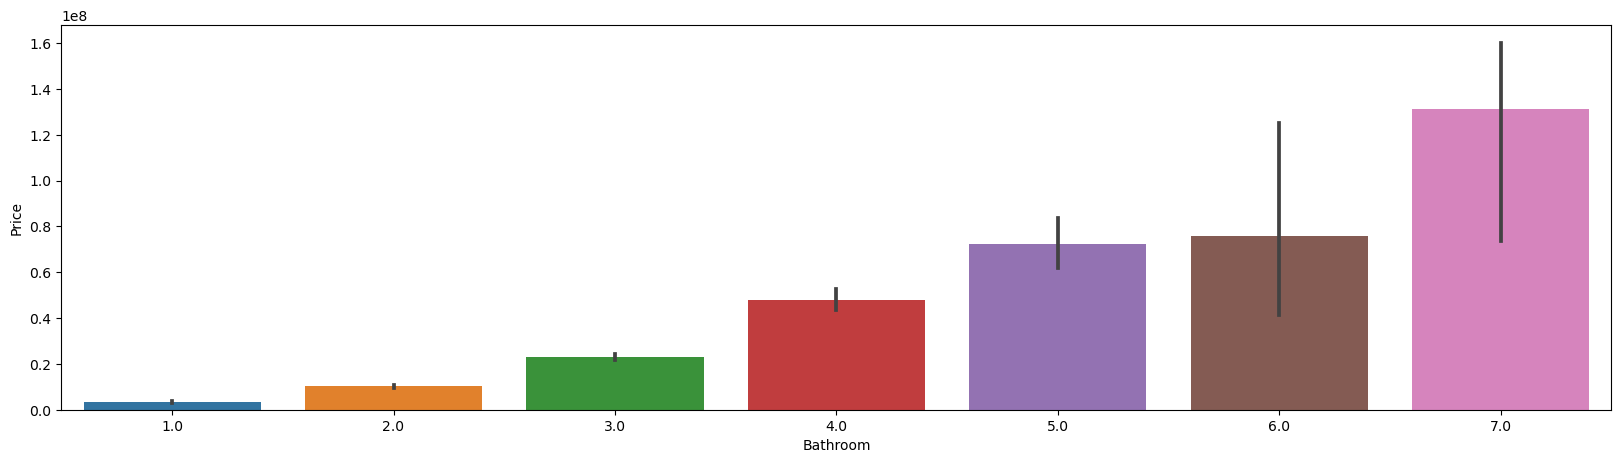

In [209]:
fig, bx = plt.subplots(figsize=(20,5))
sns.barplot(x =data.Bathroom, y = data.Price)

# BHK vs Price

<Axes: xlabel='BHK', ylabel='Price'>

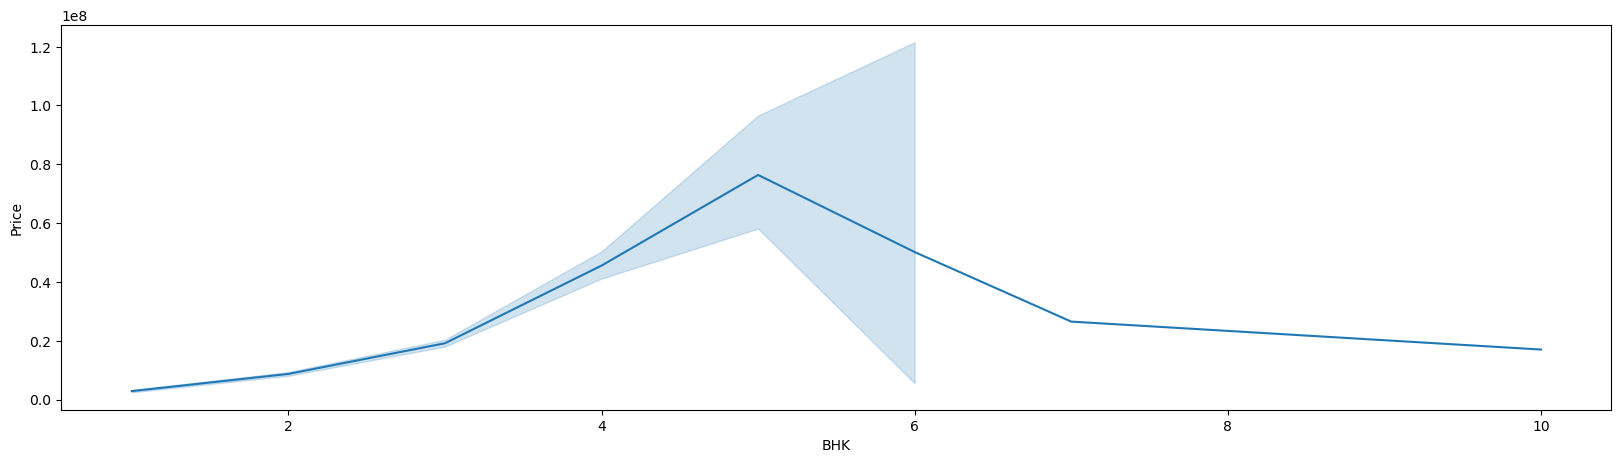

In [210]:
fig, cx = plt.subplots(figsize=(20,5))
sns.lineplot(data,x="BHK",y="Price",palette="muted")

# Splitting the train test value

In [211]:
#model building
X = data.drop(['Price'], axis=1)
Y = data['Price']

In [212]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=46)

In [213]:
print(Y.shape)

(1116,)


In [214]:
Y_train.shape

(892,)

In [215]:
Y_test.shape

(224,)

# ML Algorithms

# Linear Regression

In [216]:
lnr=LinearRegression()

In [217]:
lnr.fit(X_train,Y_train)

LinearRegression()

In [218]:
lnr_pred= lnr.predict(X_test)
lnr_pred

array([ 3.20750204e+07,  1.27426397e+07,  5.42407736e+07, -5.40241855e+06,
        2.29429196e+07,  9.97315942e+06,  6.04510845e+07,  5.22588117e+06,
        2.80696154e+07,  2.80815060e+07,  1.00212005e+07,  2.06553267e+07,
        1.30805239e+07,  1.47783286e+07,  4.10663294e+07,  3.18285855e+07,
        2.82991491e+07, -8.84975975e+06,  7.69806232e+06,  1.06665517e+07,
        1.44116916e+07,  2.11782549e+07,  1.27206234e+07, -1.65551306e+06,
        1.94111320e+07, -1.39985368e+06,  2.88755802e+07,  4.85970924e+07,
        3.50775172e+07,  3.99491728e+07,  7.23347708e+07,  6.75252212e+07,
        2.66189278e+07,  4.30941160e+06,  8.58229858e+06,  3.53871339e+07,
        8.50698388e+06,  3.21055621e+07,  3.27418287e+07,  1.07928971e+07,
        3.13220397e+07,  4.84786927e+07,  8.77165745e+06,  4.95609947e+06,
        1.49420353e+07,  6.54229953e+07,  7.52127648e+06,  7.58028356e+06,
        3.07343068e+07, -1.07150239e+07,  9.71562960e+06,  2.24828542e+07,
        2.39395154e+07,  

In [219]:
score_lnr = metrics.r2_score(Y_test, lnr_pred)
print(score_lnr)

0.6304074339259956


# Random Forest

In [222]:
#Random Forest
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [223]:
forest_pred = forest.predict(X_test)

In [224]:
forest_pred

array([3.74190000e+07, 9.74800000e+06, 6.14430000e+07, 2.65550000e+06,
       2.01690000e+07, 1.26300000e+07, 6.09870000e+07, 3.48980000e+06,
       4.05970000e+07, 1.92661000e+07, 1.68021667e+07, 1.48226000e+07,
       8.66513333e+06, 1.71556000e+07, 3.47790000e+07, 1.37136000e+07,
       2.60270000e+07, 1.90430000e+06, 1.50780000e+07, 1.60750000e+07,
       1.25584667e+07, 8.69100000e+06, 1.05850000e+07, 2.75850000e+06,
       1.36923000e+07, 9.06833333e+06, 2.22723000e+07, 4.97340000e+07,
       6.13720000e+07, 4.68470000e+07, 5.67300000e+07, 7.31030000e+07,
       3.02900000e+07, 5.52440000e+06, 9.34850000e+06, 2.43360000e+07,
       7.76302143e+06, 4.21070000e+07, 2.10518000e+07, 6.92820000e+06,
       3.15800000e+07, 4.62320000e+07, 6.45460000e+06, 4.63530000e+06,
       1.69892500e+07, 7.50380000e+07, 4.71790000e+06, 4.76900000e+06,
       1.96700000e+07, 1.94900000e+06, 5.39566667e+06, 1.22828000e+07,
       2.28490000e+07, 1.49620000e+07, 3.88706667e+06, 1.99050000e+06,
      

In [225]:
score_rf = metrics.r2_score(Y_test, forest_pred)
print(score_rf)

0.8396848586229516


# XG Boost

In [228]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [229]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([3.6413084e+07, 9.2404980e+06, 6.8970464e+07, 2.1909655e+06,
       2.3163420e+07, 1.0580374e+07, 6.2195540e+07, 4.1635842e+06,
       3.1582238e+07, 1.7558686e+07, 1.5245886e+07, 1.8755116e+07,
       7.1180175e+06, 1.7404600e+07, 3.5749008e+07, 1.4742987e+07,
       2.3025482e+07, 1.7252561e+06, 1.3947132e+07, 1.4192860e+07,
       1.4866539e+07, 8.4973220e+06, 1.1000167e+07, 2.5316638e+06,
       1.4366563e+07, 9.0345740e+06, 2.1734220e+07, 4.2822060e+07,
       3.6808480e+07, 4.5732576e+07, 5.6174292e+07, 7.2939320e+07,
       2.7014512e+07, 4.8311345e+06, 9.2632140e+06, 2.7727976e+07,
       7.0835630e+06, 3.6533144e+07, 1.8480578e+07, 7.3297955e+06,
       2.5939712e+07, 4.8032120e+07, 6.6075205e+06, 4.0312905e+06,
       1.5178659e+07, 6.8055400e+07, 3.6638185e+06, 4.0090252e+06,
       2.0638650e+07, 2.3314218e+06, 4.1460158e+06, 9.9444690e+06,
       2.3363220e+07, 1.2583207e+07, 5.0618610e+06, 1.7627719e+06,
       2.0003872e+07, 2.3110050e+08, 1.9853962e+07, 8.8247580e

In [230]:
score_xgb = metrics.r2_score(Y_test, xgb_pred)
print(score_xgb)

0.8854197071640211


# K-Nearest neighbor

In [231]:
knr = KNeighborsRegressor()
# Train Model
knr.fit(X_train, Y_train)

KNeighborsRegressor()

In [232]:
knr_pred = knr.predict(X_test)
knr_pred

array([4.4760e+07, 1.2900e+07, 6.2700e+07, 2.6700e+06, 1.9500e+07,
       1.1580e+07, 6.0000e+07, 3.9000e+06, 3.2300e+07, 2.1400e+07,
       1.5620e+07, 1.4588e+07, 9.1360e+06, 2.3480e+07, 5.1700e+07,
       6.5220e+06, 3.9600e+07, 1.8800e+06, 1.6240e+07, 2.2400e+07,
       1.3420e+07, 7.4620e+06, 8.8100e+06, 2.9200e+06, 1.5220e+07,
       7.6600e+06, 3.9960e+07, 3.0600e+07, 5.2000e+07, 3.4440e+07,
       5.5500e+07, 7.0500e+07, 2.5600e+07, 5.7600e+06, 9.3400e+06,
       2.4800e+07, 6.3000e+06, 5.1740e+07, 2.2000e+07, 8.5200e+06,
       3.0700e+07, 3.8220e+07, 4.8380e+06, 5.0420e+06, 2.2100e+07,
       7.7000e+07, 4.1600e+06, 5.5900e+06, 2.5700e+07, 3.0600e+06,
       4.9740e+06, 1.0460e+07, 1.9200e+07, 1.9078e+07, 3.1200e+06,
       2.2700e+06, 2.2700e+07, 1.2450e+08, 3.0000e+07, 5.2400e+06,
       8.3400e+06, 6.0000e+07, 1.6020e+07, 1.1300e+07, 3.0600e+06,
       1.3400e+07, 1.9200e+06, 1.9000e+07, 2.9800e+07, 1.0440e+07,
       1.0160e+07, 9.1360e+06, 4.5600e+06, 6.5000e+07, 1.3300e

In [233]:
score_knr = metrics.r2_score(Y_test, knr_pred)
print(score_knr)

0.7214537671787029


# Decision Tree

In [234]:
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [235]:
tree_prd = tree.predict(X_test)
tree_prd

array([3.62e+07, 5.50e+06, 7.00e+07, 2.60e+06, 2.40e+07, 1.16e+07,
       6.50e+07, 2.90e+06, 1.00e+06, 2.55e+07, 2.00e+07, 1.00e+07,
       4.80e+06, 1.74e+07, 1.15e+07, 1.50e+07, 1.72e+07, 1.49e+06,
       1.49e+07, 1.16e+07, 1.20e+07, 6.80e+06, 1.35e+07, 1.85e+06,
       1.74e+07, 9.20e+06, 2.49e+07, 3.80e+07, 1.00e+06, 5.00e+07,
       6.25e+07, 7.00e+07, 3.15e+07, 3.80e+06, 9.00e+06, 2.25e+07,
       7.50e+06, 4.00e+07, 1.42e+07, 6.30e+06, 3.10e+07, 4.00e+07,
       5.50e+06, 3.80e+06, 1.65e+07, 8.50e+07, 4.40e+06, 7.00e+06,
       1.40e+07, 1.60e+06, 5.50e+06, 1.35e+07, 1.50e+07, 1.48e+07,
       3.10e+06, 2.40e+06, 1.25e+07, 2.40e+08, 8.50e+06, 5.00e+06,
       4.20e+06, 6.50e+07, 1.70e+07, 1.50e+07, 2.10e+06, 3.60e+06,
       1.80e+06, 3.00e+07, 4.50e+07, 1.03e+07, 7.00e+06, 1.28e+07,
       3.10e+06, 6.25e+07, 1.00e+07, 1.28e+07, 1.42e+07, 2.40e+06,
       1.32e+07, 4.50e+06, 6.00e+06, 8.00e+07, 8.00e+07, 2.40e+06,
       8.00e+06, 1.03e+07, 2.70e+06, 2.60e+07, 4.50e+06, 1.90e

In [236]:
score_tree = metrics.r2_score(Y_test, tree_prd)
print(score_tree)

0.503761584719798


# Comparing the best algorithm

In [249]:
algorithms = ["Linear Regression", "Random Forest", "XG Boost", "K-Nearest Neighbour", "Decision tree"]
scores = [score_lnr, score_rf, score_xgb, score_knr, score_tree] 

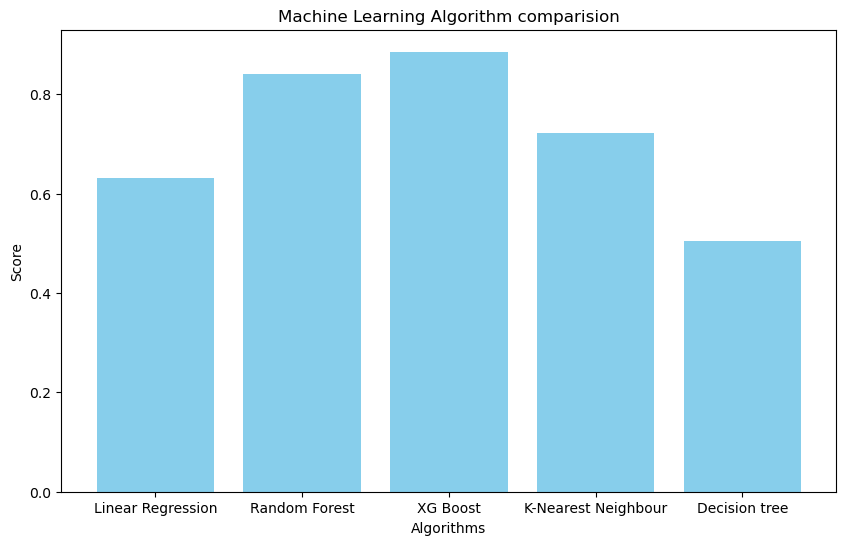

In [271]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the bar chart
plt.bar(algorithms, scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Machine Learning Algorithm comparision')
plt.show()


# Model Prediction

In [254]:
import joblib as jb

In [255]:
jb.dump(xgb,'House_Price_Predict')

['House_Price_Predict']

In [256]:
model = jb.load("House_Price_Predict")

In [257]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Price', 'Status',
       'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [258]:
data.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,1.0,6500000,1,1,0,11111.0
1,750.0,2,2.0,1,1.0,5000000,1,1,1,6667.0
2,950.0,2,2.0,2,1.0,15500000,1,0,1,6667.0
3,600.0,2,2.0,1,1.0,4200000,1,0,0,6667.0
4,650.0,2,2.0,1,1.0,6200000,1,1,0,6667.0


In [272]:
import pandas as pd
df = pd.DataFrame({
    'Area':750.0,
    'BHK':2,
    'Bathroom':2.0,
    'Furnishing':1,
    'Parking':1.0,
    'Status':1,
    'Transaction':1,
    'Type':1,
    'Per_Sqft':6667.0,
},index=[0])

In [273]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft
0,750.0,2,2.0,1,1.0,1,1,1,6667.0


In [274]:
result = model.predict(df)

In [275]:
print("The price of your house will approximately = Rs.", result.round())

The price of your house will approximately = Rs. [5595922.]
